## 파이썬 버전

In [1]:
import platform

platform.python_version()

'3.11.3'

## 필요한 모듈 import 하기

In [4]:
import threading
import time
import random
import sys
import multiprocessing

In [3]:
from IPython.display import Image

## 1. 스레드간 데이터 공유

- 스레드 간에 데이터를 안전하게 전달하기 위해서는 threading 모듈에서 제공하는 Lock 및 Queue와 같은 도구를 사용할 수 있습니다. 
- 여러 스레드에서 공유되는 데이터에 대한 안전성을 보장하기 위해 동기화 메커니즘이 필요합니다.

- threading.Lock을 사용하여 데이터에 대한 접근을 동기화하고, queue.Queue를 사용하여 스레드 간 데이터 전달을 구현합니다.

## 1-1 두 개의 스레드 간의 데이터 공유

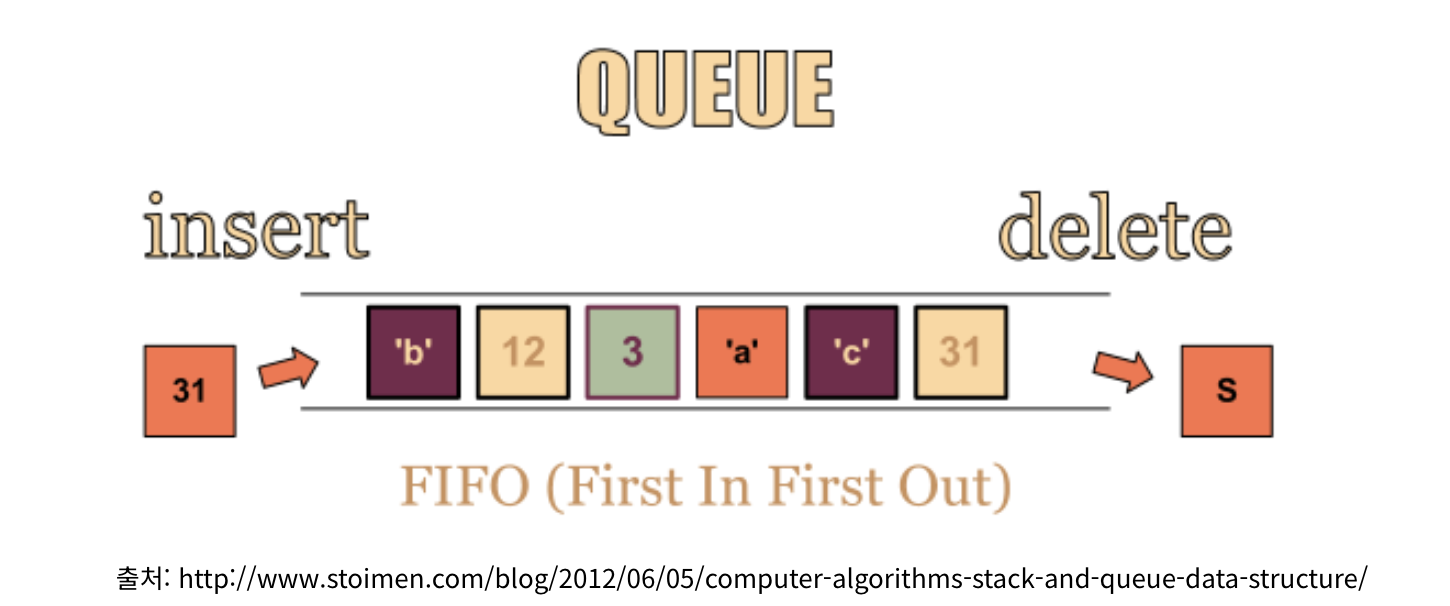

In [5]:
Image("./image/큐.png")

In [6]:
import queue

### 큐 모듈 내부 확인 

In [8]:
for i in dir(queue) :
    print(i, end=", ")

Empty, Full, LifoQueue, PriorityQueue, Queue, SimpleQueue, _PySimpleQueue, __all__, __builtins__, __cached__, __doc__, __file__, __loader__, __name__, __package__, __spec__, deque, heappop, heappush, threading, time, types, 

### queue.Queue 클래스 내부 확인 

In [9]:
for i in dir(queue.Queue) :
    print(i, end=", ")

__class__, __class_getitem__, __delattr__, __dict__, __dir__, __doc__, __eq__, __format__, __ge__, __getattribute__, __getstate__, __gt__, __hash__, __init__, __init_subclass__, __le__, __lt__, __module__, __ne__, __new__, __reduce__, __reduce_ex__, __repr__, __setattr__, __sizeof__, __str__, __subclasshook__, __weakref__, _get, _init, _put, _qsize, empty, full, get, get_nowait, join, put, put_nowait, qsize, task_done, 

### 생산자와 소비자 


- 대기큐에 요청을 집어넣는 스레드를 생산자, 대기큐에서 요청을 꺼내 처리하는 스레드를 소비자라고 할 수 있다.

- 생산자 : 웹서버에서 요청을 받기 위해 대기(listen) 하면서, 요청이 발생하면 대기큐에 해당 요청을 집어넣는 스레드
- 소비자 : 요청을 처리하기 위해 기다리면서, 대기큐에 요청이 있으면 하나씩 꺼내는 스레드

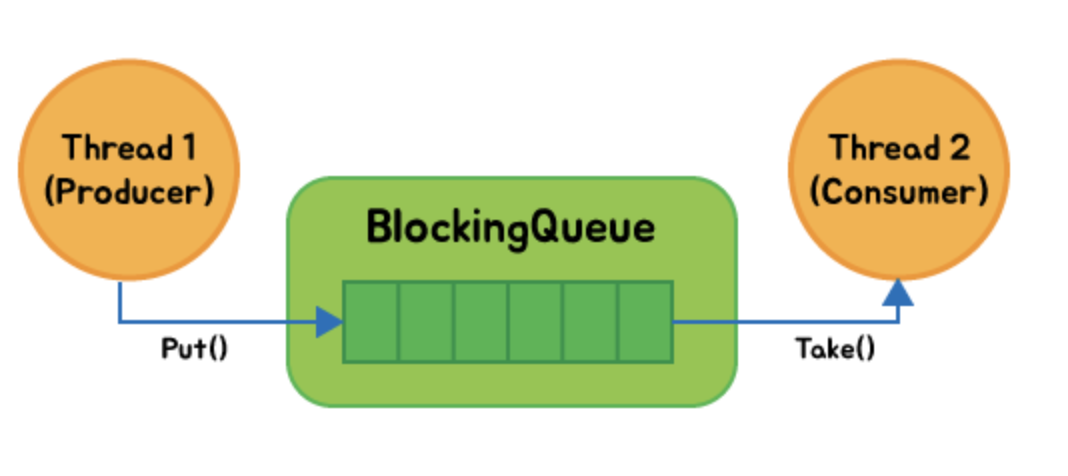

In [7]:
Image("./image/생산자와소비자.png")

### 생산자와 소비자 함수 작성 

- 함수의 매개변수로 락을 전달을 받고 실행되는 락은  with 구문으로 잡고 처리한다. 

In [97]:
def producer(queue, lock):
    for i in range(5):
        time.sleep(1)
        with lock:
            print(f"Producing {i}")
            # 큐에 정보를 전달 
            queue.put(i)

def consumer(queue, lock):
    while True:
        time.sleep(1)
        with lock:
            if not queue.empty():
                # 큐에 정보를 처리
                item = queue.get()
                print(f"Consuming {item}")
            else:
                break

### 스레드를 생산자와 소비자로 처리 

In [99]:
if __name__ == "__main__":
    
    # 큐 생성
    shared_queue = queue.Queue()
    
    # 스레드 락 
    shared_lock = threading.Lock()

    # Producer 스레드 시작
    producer_thread = threading.Thread(target=producer, args=(shared_queue, shared_lock))
    producer_thread.start()

    # Consumer 스레드 시작
    consumer_thread = threading.Thread(target=consumer, args=(shared_queue, shared_lock))
    consumer_thread.start()

    # 각 스레드가 완료될 때까지 대기
    producer_thread.join()
    consumer_thread.join()

    print("Both threads are completed")


Producing 0
Consuming 0
Producing 1
Consuming 1
Producing 2
Consuming 2
Producing 3
Producing 4
Both threads are completed


## 2.  여러 스레드 만들어서 실행해보기  

-  함수 정의
- 스레드 내에 함수 지정
- 스레드 시작과 조인 

### 스레드에 들어갈 함수 정의

In [1]:
def executeThread(i) :
    print(f"Thread {i} started")
    sleepTime = random.randint(1,10)
    time.sleep(sleepTime)
    print(f"Thread sleep {sleepTime} ")

### 스레드 시작 및 종료

In [4]:
for i in range(10) :
    thread = threading.Thread(target=executeThread, args=(i,))
    
    thread.start()   # 스레드 시작


print("Active Threads", threading.enumerate())
thread.join()

Thread 0 startedThread 1 started

Thread 2 started
Thread 3 started
Thread 4 started
Thread 5 started
Thread 6 started
Thread 7 started
Thread 8 started
Thread 9 started
Active Threads [<_MainThread(MainThread, started 7978636032)>, <Thread(IOPub, started daemon 6111883264)>, <Heartbeat(Heartbeat, started daemon 6128709632)>, <Thread(Thread-3 (_watch_pipe_fd), started daemon 6146682880)>, <Thread(Thread-4 (_watch_pipe_fd), started daemon 6163509248)>, <ControlThread(Control, started daemon 10754224128)>, <HistorySavingThread(IPythonHistorySavingThread, started 10771050496)>, <ParentPollerUnix(Thread-2, started daemon 10787876864)>, <Thread(Thread-5 (executeThread), started 10804703232)>, <Thread(Thread-6 (executeThread), started 10821529600)>, <Thread(Thread-7 (executeThread), started 10838355968)>, <Thread(Thread-8 (executeThread), started 10855182336)>, <Thread(Thread-9 (executeThread), started 10872008704)>, <Thread(Thread-10 (executeThread), started 10888835072)>, <Thread(Thread-11

##  3. 스레드별로  함수 지정해서  실행하기 

- threading.Thread를 사용하여 각 작업을 별도의 스레드로 만들고, start() 메서드로 각 스레드를 시작합니다. 
- 그리고 join() 메서드로 각 스레드가 완료될 때까지 기다립니다.

### 두 개의 작업(task1 및 task2)을 각각의 스레드에서 실행합니다.

In [5]:
def task1():
    for _ in range(5):
        print("Task 1 is running  ",threading.current_thread()," ")
        time.sleep(1)

def task2():
    for _ in range(5):
        print("Task 2 is running  ",threading.current_thread(), " ")
        time.sleep(1)

###  스레드를 2개 만들어서 실행합니다.

In [6]:
if __name__ == "__main__":
    # 두 개의 스레드 생성
    thread1 = threading.Thread(target=task1)
    thread2 = threading.Thread(target=task2)
    
    print("main thread : ", threading.main_thread())
    # 각각의 스레드 시작
    thread1.start()
    thread2.start()
    print("active count : ", threading.active_count())
    
    # 각각의 스레드가 완료될 때까지 대기
    thread1.join()
    thread2.join()

    print("Both tasks are completed")


main thread :  <_MainThread(MainThread, started 7978636032)>
Task 1 is running   <Thread(Thread-15 (task1), started 10804703232)>  
Task 2 is running   <Thread(Thread-16 (task2), started 10821529600)>  
active count :  10
Task 2 is running   <Thread(Thread-16 (task2), started 10821529600)>  
Task 1 is running   <Thread(Thread-15 (task1), started 10804703232)>  
Task 2 is running   <Thread(Thread-16 (task2), started 10821529600)>  
Task 1 is running   <Thread(Thread-15 (task1), started 10804703232)>  
Task 2 is running  Task 1 is running   <Thread(Thread-15 (task1), started 10804703232)>  
 <Thread(Thread-16 (task2), started 10821529600)>  
Task 1 is running  Task 2 is running   <Thread(Thread-16 (task2), started 10821529600)>  
 <Thread(Thread-15 (task1), started 10804703232)>  
Both tasks are completed


## 4. 스레드 풀을 만들어서 처리하기

In [1]:
import threading
import queue
import time

# 작업을 처리할 함수
def worker(task_queue):
    while True:
        # 큐에서 작업 가져오기
        task = task_queue.get()
        if task is None:
            break
        # 작업 처리
        print(f"Task started: {task}")
        time.sleep(2)  # 작업 시뮬레이션을 위해 2초 대기
        print(f"Task finished: {task}")
        task_queue.task_done()



In [2]:
if __name__ == "__main__":
    num_threads = 3  # 사용할 스레드 수
    tasks = ["Task 1", "Task 2", "Task 3", "Task 4", "Task 5"]

    # 작업을 담을 큐 생성
    task_queue = queue.Queue()

    # 스레드 풀 생성 및 실행
    threads = []
    for _ in range(num_threads):
        t = threading.Thread(target=worker, args=(task_queue,))
        t.start()
        threads.append(t)

    # 작업 큐에 작업 추가
    for task in tasks:
        task_queue.put(task)

    # 모든 작업이 끝날 때까지 대기
    task_queue.join()

    # 스레드 종료
    for _ in range(num_threads):
        task_queue.put(None)  # 작업이 끝났음을 알리기 위해 None 추가
    for t in threads:
        t.join()

    print("All tasks completed")


Task started: Task 1Task started: Task 2

Task started: Task 3
Task finished: Task 1
Task started: Task 4
Task finished: Task 2
Task started: Task 5
Task finished: Task 3
Task finished: Task 4
Task finished: Task 5
All tasks completed
